# Автоассоциативные сети с узким горлом
### Цель работы:
исследование свойств автоассоциативных сетей с узким горлом, алгоритмов обучения, а также применение сетей для выполнения линейного и нелинейного анализа главных компонент набора данных.

In [249]:
import numpy as np
import pyrenn
from matplotlib import pyplot as plt

## Задание 1
Использовать автоассоциативную сеть с узким горлом для отображения набора данных, выделяя первую главную компоненту данных.

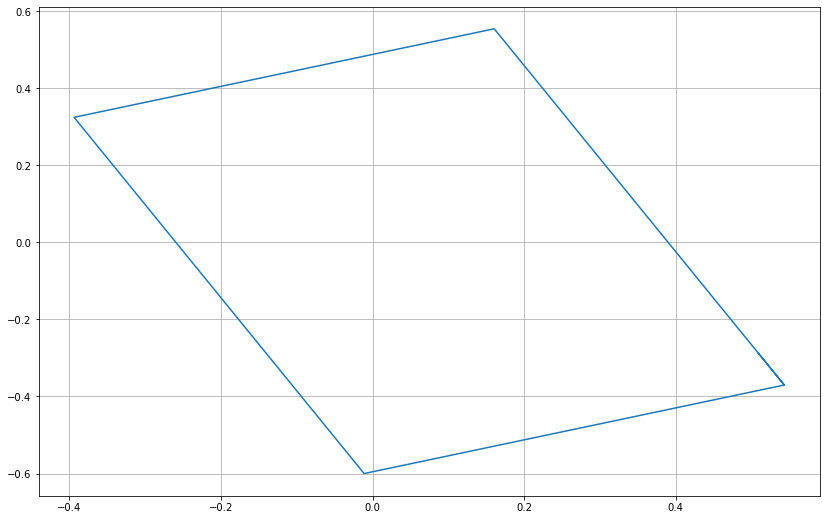

In [250]:
def f(t):
    return 0.3 * (np.cos(np.pi/2 * np.floor(t)) - (2 * t - 2 * np.floor(t) - 1) * np.sin(np.pi/2 * np.floor(t)) + 0.2)

def g(t):
    return 0.5 * (np.sin(np.pi/2 * np.floor(t)) + (2 * t - 2 * np.floor(t) - 1) * np.cos(np.pi/2 * np.floor(t)) - 0.1)
x = np.array([f(t) * np.cos(np.pi/8) - g(t)*np.sin(np.pi/8) for t in np.arange(0, 4.1, 0.01)])
y = np.array([f(t) * np.sin(np.pi/8) + g(t)*np.cos(np.pi/8) for t in np.arange(0, 4.1, 0.01)])
plt.figure(figsize=(14, 9))
plt.plot(x, y)
plt.grid(True)
plt.show()

Maximum number of iterations reached


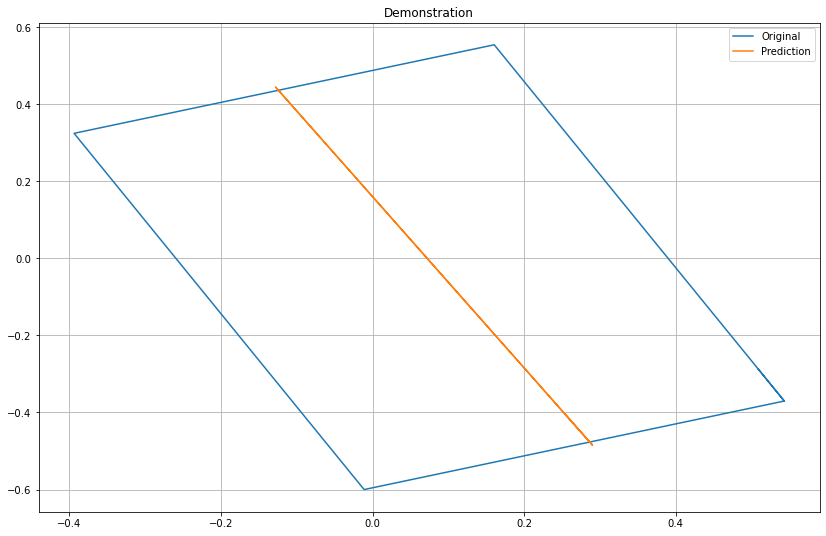

In [251]:
train_data = np.array([x, y])
nn = pyrenn.CreateNN([2, 1, 2])
nn = pyrenn.train_LM(train_data, train_data, nn, E_stop=1e-5, k_max=200)
pred = pyrenn.NNOut(train_data, nn)
plt.figure(figsize=(14, 9))
plt.plot(train_data[0], train_data[1], label="Original")
plt.plot(pred[0], pred[1], label="Prediction")
plt.grid(True)
plt.title('Demonstration')
plt.legend()
plt.show()

## Задание 2
Использовать автоассоциативную сеть с узким горлом для аппроксимации кривой на плоскости, выделяя первую нелинейную главную компоненту данных.

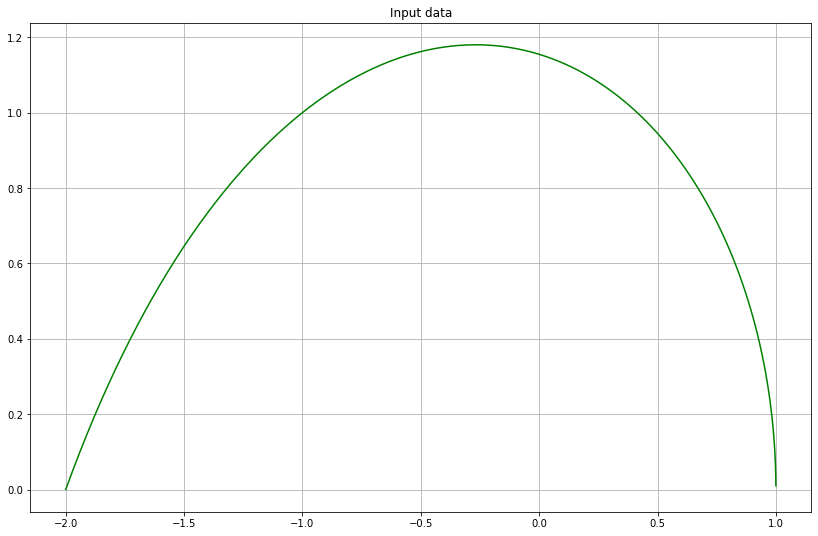

In [252]:
def get_curve(phi):
    r = 1 / np.cos(phi/3)
    return r*np.cos(phi), r*np.sin(phi)
phi = np.linspace(0.01, np.pi, int(np.pi / 0.025))
x, y = get_curve(phi)
plt.figure(figsize=(14, 9))
plt.plot(x, y, 'green')
plt.grid(True)
plt.title('Input data')
plt.show()

Termination Error reached


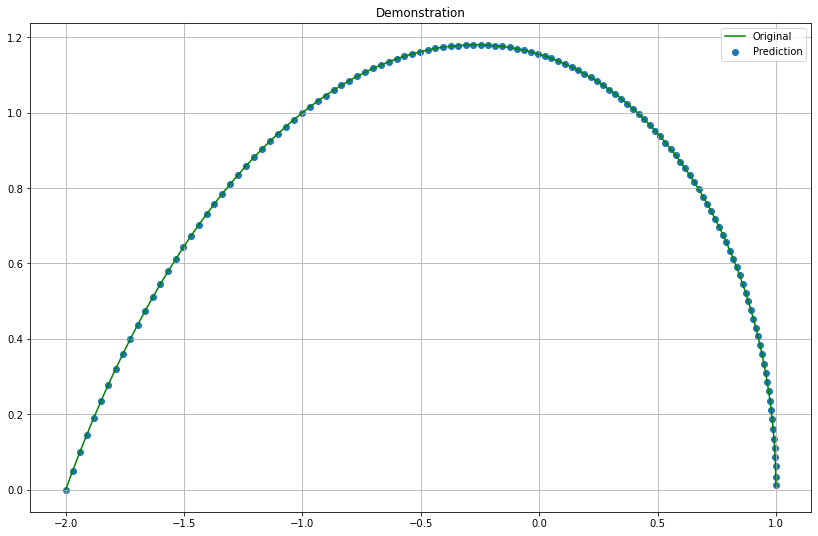

In [253]:
nn = pyrenn.CreateNN([1, 10, 1, 10, 1])
nn2 = pyrenn.train_LM(x, y, nn, E_stop=1e-5, k_max=2000)
a = pyrenn.NNOut(x, nn)
plt.figure(figsize=(14, 9))
plt.plot(x, y, 'green', label='Original')
plt.scatter(x, a, label='Prediction')
plt.grid(True)
plt.title('Demonstration')
plt.legend()
plt.show()

## Задание 3
Применить автоассоциативную сеть с узким горлом для аппроксимации пространственной кривой, выделяя старшие нелинейные главные компоненты данных.

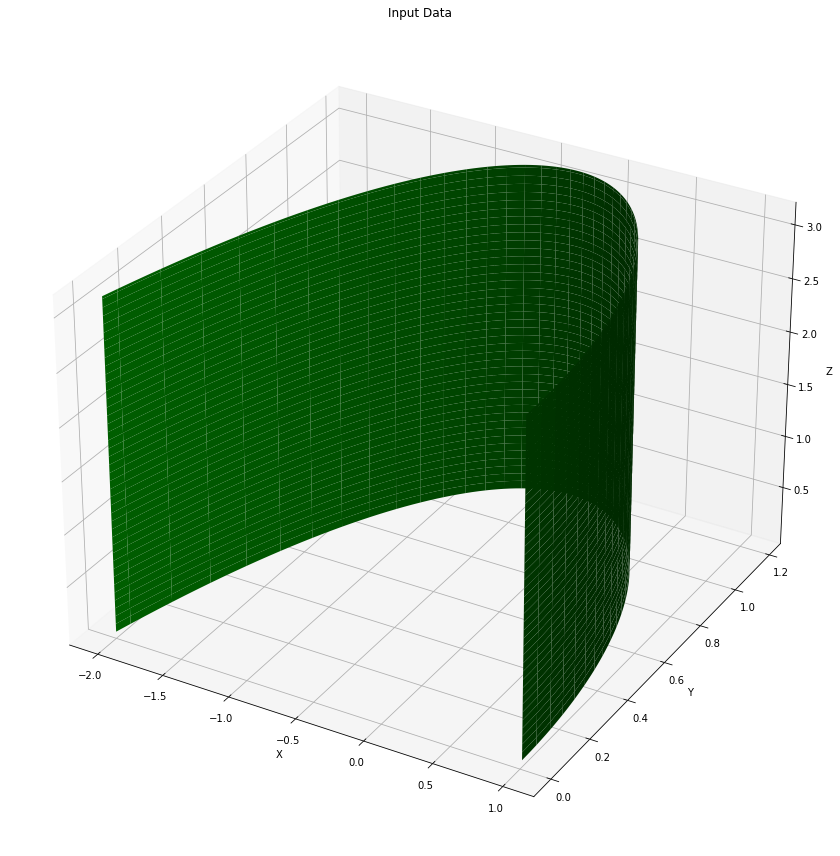

In [254]:
phi = np.linspace(0.01, np.pi, int(np.pi / 0.025))
x, y = get_curve(phi)
fig = plt.figure(num=1, figsize=(19, 12), clear=True)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x, y, phi.reshape(-1, 1), color='green')
ax.set_title('Input Data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.tight_layout()

Termination Error reached


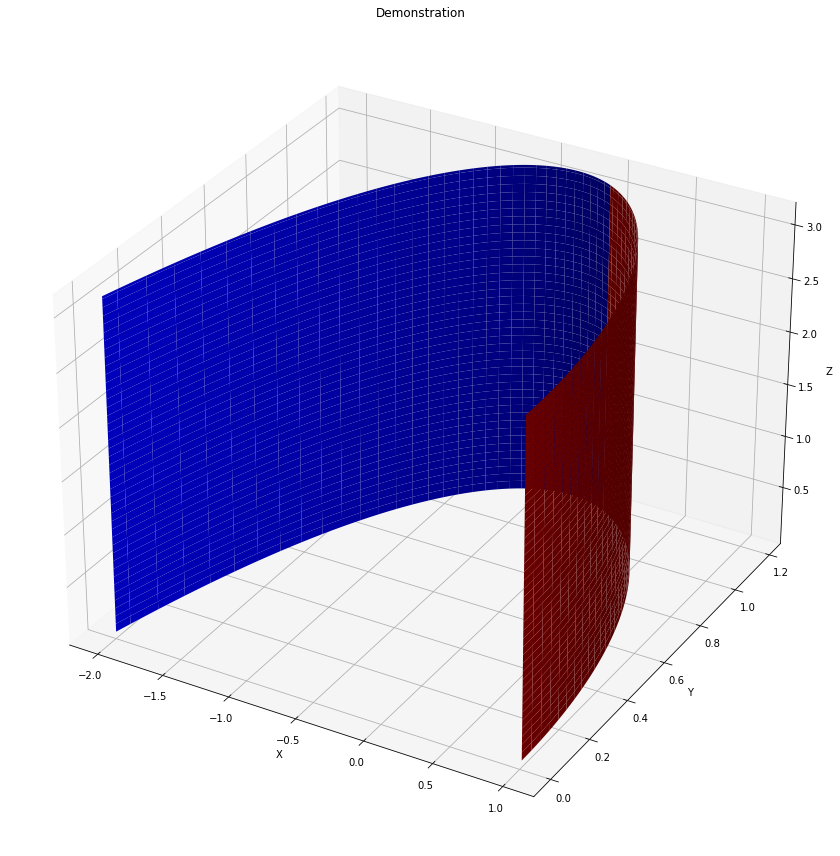

In [258]:
nn = pyrenn.CreateNN([2, 10, 2,  10, 1])
nn = pyrenn.train_LM(np.array([x, phi]), y, nn, E_stop=1e-5, k_max=500)
a = pyrenn.NNOut(np.array([x, phi]), nn)
fig = plt.figure(num=1, figsize=(19, 12), clear=True)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x[:x.size//2], y[:y.size//2], phi.reshape(-1, 1), color='red')
ax.plot_surface(x[x.size//2-1:], a[y.size//2-1:], phi.reshape(-1, 1), color='blue')
ax.set_title('Demonstration')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.tight_layout()